# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Parametros-iniciales" data-toc-modified-id="Parametros-iniciales-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parametros iniciales</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-motor" data-toc-modified-id="Rotación-de-P4---referencia-motor-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Rotación de P4 - referencia motor</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-polarizador" data-toc-modified-id="Rotación-de-P4---referencia-polarizador-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rotación de P4 - referencia polarizador</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Final</a></div>

# Determinación de los parámetros de los polarizadores lineales

**Autor**: Jesús del Hoyo

**Fecha**:   30/07/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

In this case, we are going to record all experimental measurements needed for the characterization of the polarimeter. We will introduce elements one after the other. Light will be measured by a photodetector (), while the variables will be one or two rotation angles.

**Illumination**:
1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm.
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.

**Intensity calibration**
Photodiode linearity will be measured manually. Then, the intensity will be chosen to be in the topmost part of the linear regime to maximize signal. The intensity value will allow having an absolute value of Imax.
Intensity value without light will be measured for each experiment.

**1st experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador 1 LPNIRE100-B (P2).

Important: This experiment is repeated three times changing alternatively P1 and P2 by another polarizer P3. In this way, we can discriminate P1 and P2 (and P3) Jones matrices, so we eliminate the assumption P1 = P2.

Variables: 
1. 1D, second polarizer rotation

Parameters that can be extracted from fit:
1. P1 and P2 (and P3) Jones matrices.

**2nd experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Polarizador de eje conocido.

Variables: 
1. 1D, P1 rotation

Parameters that can be extracted from fit:
1. Theta 0 of P1. This will be our 0 reference of angles.

Then we repeat 1st experiment with P1 and P2 so we find out Th0 of P2.

**3rd experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 1D, P1 rotation, P2 horizontal.
1. 1D, P1 rotation, P2 vertical.
1. 2D, P1 and P2 rotation.

Parameters that can be extracted from fit:
1. Theta 0 of BS.
1. BS parameters (moddeled as diattenuator retarder).

**4th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, P1 and P2 rotation.
1. 2D, R1 and P2 rotation.

Parameters that can be extracted from fit:
1. Theta 0 of R1.
1. R parameters (moddeled as diattenuator retarder).

**5th experiment**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).
1. Divisor de haz Thorlabs CCM1-BS014/M (BS).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 1 LPNIRE100-B (P2).

Variables: 
1. 2D, R1 and R2 rotation, both polarizers horizontal.
1. 2D, R1 and R2 rotation, first polarizer horizontal, second polarizer vertical.

Parameters that can be extracted from fit:
1. Theta 0 of R2.
1. Fine tuning of R parameters (moddeled as diattenuator retarder).



In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from __future__ import print_function, division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint

from scipy.io import savemat, loadmat

from polarimeter.utils import dibujar_2d_fitting

## Preparar los experimentos

Tarjeta de adquisición de datos.

In [10]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [11]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_number=1

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
# ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
# ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
# print(ainValue)

Parametros iniciales

In [12]:
from polarimeter.polarimeter import get_polarimeter_parameters, degrees, degrees_motor

config_dicts=get_polarimeter_parameters(kind='exp')

pol1,pol2,pol3,pol4=config_dicts
theta1=pol1['theta_axis']
theta4=pol4['theta_axis']

print("theta_1={}º, theta_4={}º".format(theta1/degrees, theta4/degrees))

theta_1=-2.788º, theta_4=-161.88º


Motores

In [13]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels=[50,50,50,50]

In [14]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



## Iluminación

Medida de la linealidad del fotodiodo detector. De momento, la toma de datos se hace manual.

In [15]:
intensity = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

4.0282, 

Guardar el nivel de Imax para una combinación de I, y V.

In [16]:
# I = 338 mA
# V = 2.56 V
intensity_max = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

3.9361, 

In [17]:
# Apagar diodo
intensity_max0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

-0.0039, 

Ahora, vamos a medir la circularidad de la luz incidente, pues podría ser uno de los motivos por los que el modelo no funciona. Para ello, usaremos P2.

Primero, usaremos el polarizador de eje conocido para tener una referencia absoluta del angulo de P2.

In [20]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

-0.0039, 

1.0604, 0.9734, 0.8916, 0.8046, 0.7278, 0.6613, 0.5999, 0.5487, 0.5129, 0.4822, 0.4669, 0.4566, 0.4618, 0.4822, 0.5129, 0.5539, 0.6050, 0.6664, 0.7381, 0.8097, 0.8916, 0.9786, 1.0604, 1.1576, 1.2395, 1.3214, 1.4033, 1.4698, 1.5312, 1.5823, 1.6284, 1.6642, 1.6847, 1.6949, 1.6898, 1.6796, 1.6437, 1.6079, 1.5568, 1.5056, 1.4340, 1.3572, 1.2753, 1.1883, 1.1065, 1.0195, 0.9274, 0.8506, 0.7739, 0.6971, 0.6357, 0.5794, 0.5334, 0.5027, 0.4720, 0.4618, 0.4618, 0.4720, 0.4976, 0.5334, 0.5794, 0.6408, 0.7022, 0.7790, 0.8609, 0.9376, 1.0195, 1.1167, 1.2037, 1.2856, 1.3674, 1.4391, 1.5107, 1.5670, 1.6182, 1.6540, 1.6796, 1.6949, 1.6949, 1.6898, 1.6693, 1.6335, 1.5875, 1.5363, 1.4749, 1.3981, 1.3214, 1.2395, 1.1525, 1.0655, 

(0, 1.7837326593697072)

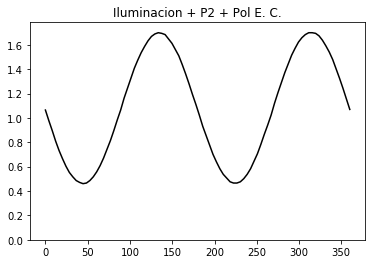

In [21]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = sp.zeros_like(angle1,dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, angle, 0, 0], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_IlumA_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1,'k')
plt.title('Iluminacion + P2 + Pol E. C.')
plt.ylim(0,intensity1.max()*1.05)

Ahora retiro el polarizador de eje conocido para medir la iluminacion unicamente.

1.8894, 1.8894, 1.8894, 1.8791, 1.8791, 1.8791, 1.8740, 1.8740, 1.8689, 1.8689, 1.8638, 1.8689, 1.8638, 1.8638, 1.8638, 1.8638, 1.8689, 1.8689, 1.8689, 1.8689, 1.8791, 1.8791, 1.8842, 1.8894, 1.8894, 1.8894, 1.8945, 1.8996, 1.8996, 1.9047, 1.9047, 1.9047, 1.9047, 1.9047, 1.9047, 1.9098, 1.9047, 1.9047, 1.9047, 1.8996, 1.9047, 1.8945, 1.8945, 1.8996, 1.8894, 1.8842, 1.8842, 1.8842, 1.8842, 1.8740, 1.8740, 1.8791, 1.8689, 1.8740, 1.8740, 1.8740, 1.8740, 1.8689, 1.8740, 1.8740, 1.8791, 1.8791, 1.8791, 1.8842, 1.8842, 1.8894, 1.8894, 1.8945, 1.8996, 1.8996, 1.8996, 1.9047, 1.9098, 1.9098, 1.9047, 1.9098, 1.9047, 1.9047, 1.9098, 1.9098, 1.9047, 1.9047, 1.9047, 1.9047, 1.9047, 1.9047, 1.8996, 1.8996, 1.8945, 1.8945, 

(0, 2.0093855861574412)

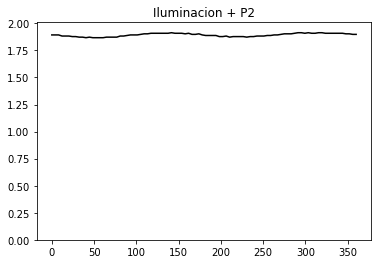

In [22]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = sp.zeros_like(angle1,dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, angle, 0, 0], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_IlumB_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1,'k')
plt.title('Iluminacion + P2')
plt.ylim(0,intensity1.max()*1.05)

En esta ocasion voy a añadir R1 ANTES de P1 para ver si encuentro alguna diferencia. En este caso, haré un doble bucle.



1.9610, 1.9456, 1.9405, 1.9405, 1.9508, 1.9559, 1.9559, 1.9456, 1.9405, 1.9405, 1.9456, 1.9559, 1.9661, 1.9559, 

1.9508, 1.9405, 1.9354, 1.9456, 1.9508, 1.9559, 1.9508, 1.9405, 1.9405, 1.9405, 1.9559, 1.9559, 1.9559, 1.9508, 

1.9456, 1.9354, 1.9303, 1.9405, 1.9559, 1.9610, 1.9508, 1.9354, 1.9354, 1.9354, 1.9559, 1.9610, 1.9559, 1.9405, 

1.9456, 1.9303, 1.9303, 1.9405, 1.9508, 1.9559, 1.9456, 1.9354, 1.9303, 1.9354, 1.9559, 1.9610, 1.9610, 1.9405, 

1.9405, 1.9201, 1.9252, 1.9405, 1.9610, 1.9610, 1.9456, 1.9252, 1.9201, 1.9354, 1.9559, 1.9661, 1.9610, 1.9405, 

1.9508, 1.9252, 1.9149, 1.9303, 1.9559, 1.9661, 1.9610, 1.9354, 1.9201, 1.9303, 1.9456, 1.9610, 1.9661, 1.9508, 

1.9508, 1.9354, 1.9149, 1.9201, 1.9456, 1.9610, 1.9559, 1.9405, 1.9252, 1.9252, 1.9405, 1.9610, 1.9661, 1.9508, 

1.9456, 1.9405, 1.9252, 1.9303, 1.9405, 1.9508, 1.9508, 1.9405, 1.9354, 1.9303, 1.9405, 1.9508, 1.9508, 1.9456, 

1.9405, 1.9303, 1.9252, 1.9303, 1.9405, 1.9456, 1.9456, 1.9354, 1.9303, 1.9354, 1.9405

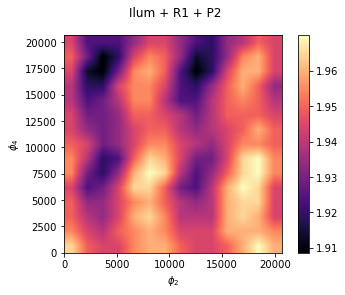

In [24]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,360,num_dataX)
angles2y = sp.linspace(0,360,num_dataY)
intensities_2 = sp.zeros((num_dataX, num_dataY),dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [angle1, angle4, 0, 0], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_IlumC_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2, intensity_max=intensity_max-intensity_max0)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2, title='Ilum + R1 + P2')

##  1st experiment

Introduce P1 and P2.

In [37]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

-0.0039, 

**Experiment 1a**

P2 and P3.

0.1138, 0.0831, 0.0729, 0.0780, 0.1036, 0.1394, 0.2008, 0.2673, 0.3492, 0.4413, 0.5436, 0.6613, 0.7739, 0.8916, 1.0093, 1.1321, 1.2446, 1.3521, 1.4493, 1.5363, 1.6182, 1.6744, 1.7205, 1.7563, 1.7717, 1.7666, 1.7512, 1.7103, 1.6642, 1.5926, 1.5158, 1.4288, 1.3265, 1.2139, 1.1014, 0.9837, 0.8609, 0.7432, 0.6255, 0.5232, 0.4157, 0.3287, 0.2417, 0.1854, 0.1292, 0.0933, 0.0729, 0.0678, 0.0882, 0.1189, 0.1650, 0.2264, 0.3031, 0.3901, 0.4873, 0.5999, 0.7125, 0.8353, 0.9479, 1.0707, 1.1883, 1.2958, 1.3981, 1.4954, 1.5772, 1.6489, 1.7000, 1.7410, 1.7666, 1.7717, 1.7614, 1.7307, 1.6898, 1.6284, 1.5619, 1.4698, 1.3777, 1.2753, 1.1628, 1.0400, 0.9223, 0.8046, 0.6869, 0.5692, 0.4669, 0.3748, 0.2878, 0.2161, 0.1496, 0.1138, 

(0, 1.8643229903653264)

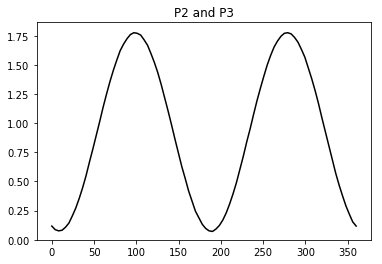

In [26]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = sp.zeros_like(angle1,dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, 0, angle], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_1a_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1,'k')
plt.title('P2 and P3')
plt.ylim(0,intensity1.max()*1.05)

**Experiment 1b**

P1 and P3.

0.8813, 1.0041, 1.1269, 1.2446, 1.3521, 1.4544, 1.5465, 1.6284, 1.6949, 1.7512, 1.7819, 1.7973, 1.8024, 1.7870, 1.7563, 1.7000, 1.6386, 1.5670, 1.4800, 1.3777, 1.2651, 1.1525, 1.0297, 0.9120, 0.7892, 0.6664, 0.5590, 0.4515, 0.3594, 0.2724, 0.2008, 0.1445, 0.1087, 0.0780, 0.0729, 0.0882, 0.1138, 0.1599, 0.2213, 0.2929, 0.3799, 0.4771, 0.5897, 0.7022, 0.8199, 0.9376, 1.0604, 1.1781, 1.2907, 1.4033, 1.5005, 1.5823, 1.6591, 1.7205, 1.7717, 1.7921, 1.8024, 1.7973, 1.7717, 1.7358, 1.6796, 1.6079, 1.5209, 1.4288, 1.3214, 1.2088, 1.0962, 0.9683, 0.8506, 0.7278, 0.6153, 0.5078, 0.4004, 0.3134, 0.2366, 0.1752, 0.1240, 0.0933, 0.0780, 0.0780, 0.0985, 0.1343, 0.1854, 0.2520, 0.3338, 0.4259, 0.5334, 0.6408, 0.7585, 0.8813, 

(0, 1.8965591227635743)

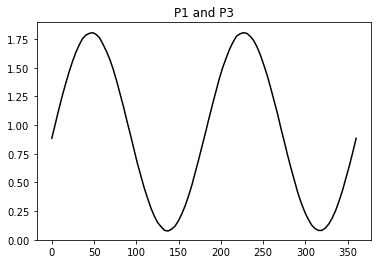

In [27]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = sp.zeros_like(angle1,dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, 0, angle], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_1b_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1,'k')
plt.title('P1 and P3')
plt.ylim(0,intensity1.max()*1.05)

**Experiment 1c**

P1 and P2.

1.3060, 1.4135, 1.5107, 1.5977, 1.6744, 1.7307, 1.7819, 1.8075, 1.8126, 1.8075, 1.7819, 1.7410, 1.6847, 1.6130, 1.5363, 1.4340, 1.3265, 1.2139, 1.0962, 0.9683, 0.8506, 0.7278, 0.6101, 0.5027, 0.4004, 0.3082, 0.2315, 0.1701, 0.1189, 0.0882, 0.0678, 0.0780, 0.0985, 0.1343, 0.1854, 0.2520, 0.3338, 0.4259, 0.5334, 0.6408, 0.7636, 0.8865, 1.0041, 1.1269, 1.2446, 1.3521, 1.4595, 1.5465, 1.6335, 1.6949, 1.7512, 1.7870, 1.8075, 1.8075, 1.7870, 1.7614, 1.7051, 1.6489, 1.5670, 1.4800, 1.3777, 1.2702, 1.1525, 1.0297, 0.9120, 0.7892, 0.6664, 0.5590, 0.4515, 0.3543, 0.2724, 0.1957, 0.1496, 0.1087, 0.0780, 0.0729, 0.0831, 0.1138, 0.1547, 0.2161, 0.2878, 0.3748, 0.4771, 0.5846, 0.6971, 0.8199, 0.9427, 1.0604, 1.1883, 1.2958, 

(0, 1.9073045002296567)

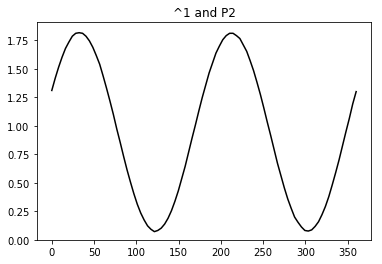

In [28]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = sp.zeros_like(angle1,dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, 0, angle], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_1c_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1,'k')
plt.title('^1 and P2')
plt.ylim(0,intensity1.max()*1.05)

##  2nd experiment

Introduce P1 and known polarizer.

In [44]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

-0.0039, 

[   0.            4.04494382    8.08988764   12.13483146   16.17977528
   20.2247191    24.26966292   28.31460674   32.35955056   36.40449438
   40.4494382    44.49438202   48.53932584   52.58426966   56.62921348
   60.6741573    64.71910112   68.76404494   72.80898876   76.85393258
   80.8988764    84.94382022   88.98876404   93.03370787   97.07865169
  101.12359551  105.16853933  109.21348315  113.25842697  117.30337079
  121.34831461  125.39325843  129.43820225  133.48314607  137.52808989
  141.57303371  145.61797753  149.66292135  153.70786517  157.75280899
  161.79775281  165.84269663  169.88764045  173.93258427  177.97752809
  182.02247191  186.06741573  190.11235955  194.15730337  198.20224719
  202.24719101  206.29213483  210.33707865  214.38202247  218.42696629
  222.47191011  226.51685393  230.56179775  234.60674157  238.65168539
  242.69662921  246.74157303  250.78651685  254.83146067  258.87640449
  262.92134831  266.96629213  271.01123596  275.05617978  279.1011236
  283.1

(0, 1.7837326593697072)

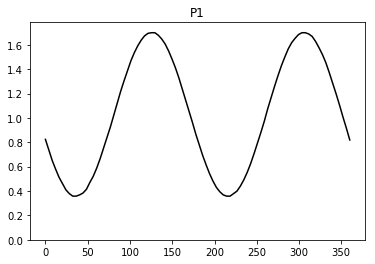

In [29]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = sp.zeros_like(angle1,dtype=float)
print(angle1)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [angle, 0, 0, 0], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_2a_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1,'k')
plt.title('P1')
plt.ylim(0,intensity1.max()*1.05)

**Experiment 2b**

P1 and P2.

1.7512, 1.7768, 1.7921, 1.7921, 1.7768, 1.7410, 1.6847, 1.6182, 1.5363, 1.4442, 1.3419, 1.2344, 1.1167, 0.9939, 0.8711, 0.7483, 0.6306, 0.5232, 0.4208, 0.3287, 0.2468, 0.1854, 0.1343, 0.0933, 0.0729, 0.0729, 0.0933, 0.1240, 0.1701, 0.2366, 0.3082, 0.4055, 0.5027, 0.6101, 0.7227, 0.8455, 0.9632, 1.0911, 1.2088, 1.3163, 1.4237, 1.5209, 1.6028, 1.6693, 1.7205, 1.7666, 1.7921, 1.7921, 1.7870, 1.7563, 1.7103, 1.6540, 1.5721, 1.4954, 1.3930, 1.2856, 1.1730, 1.0502, 0.9274, 0.8097, 0.6971, 0.5794, 0.4720, 0.3748, 0.2878, 0.2161, 0.1547, 0.1138, 0.0831, 0.0729, 0.0780, 0.1036, 0.1445, 0.1957, 0.2673, 0.3543, 0.4515, 0.5539, 0.6664, 0.7841, 0.9018, 1.0246, 1.1474, 1.2600, 1.3674, 1.4698, 1.5568, 1.6386, 1.7000, 1.7512, 

(0, 1.8858137452974917)

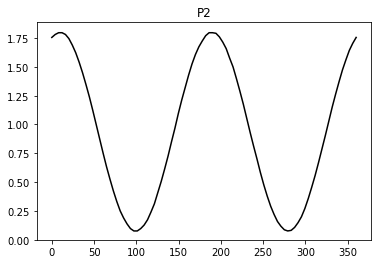

In [30]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = sp.zeros_like(angle1,dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, 0, angle], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_2b_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1,'k')
plt.title('P2')
plt.ylim(0,intensity1.max()*1.05)

##  3rd experiment

Introduce BS. First step, both polarizers horizontal.

In [50]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

-0.0039, 

1.5363, 1.4954, 1.4391, 1.3674, 1.2856, 1.2037, 1.1065, 1.0041, 0.9018, 0.7995, 0.6869, 0.5846, 0.4873, 0.3952, 0.3134, 0.2417, 0.1803, 0.1343, 0.0933, 0.0729, 0.0678, 0.0780, 0.1087, 0.1394, 0.1957, 0.2571, 0.3338, 0.4157, 0.5129, 0.6101, 0.7125, 0.8199, 0.9223, 1.0297, 1.1269, 1.2190, 1.3060, 1.3777, 1.4493, 1.5005, 1.5363, 1.5619, 1.5721, 1.5721, 1.5465, 1.5158, 1.4595, 1.3981, 1.3316, 1.2497, 1.1525, 1.0553, 0.9530, 0.8455, 0.7381, 0.6357, 0.5385, 0.4413, 0.3543, 0.2775, 0.2110, 0.1496, 0.1138, 0.0780, 0.0678, 0.0678, 0.0882, 0.1240, 0.1650, 0.2213, 0.2878, 0.3748, 0.4618, 0.5539, 0.6562, 0.7688, 0.8711, 0.9786, 1.0809, 1.1781, 1.2651, 1.3470, 1.4186, 1.4800, 1.5261, 1.5516, 1.5721, 1.5721, 1.5619, 1.5312, 

(0, 1.6547881297767164)

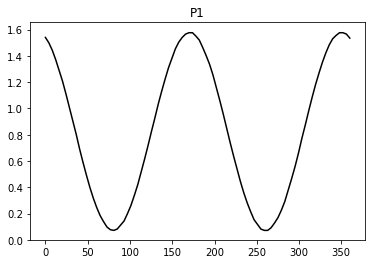

In [31]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = sp.zeros_like(angle1,dtype=float)
th0p1 = 0 # To have always the same reference of angles
th0p2 = 0 # To have always the same reference of angles
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move( 
        positions = [angle, 0, 0, th0p2], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_3a_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1,'k')
plt.title('P1')
plt.ylim(0,intensity1.max()*1.05)

Now, same for P2 vertical

In [77]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

-0.0039, 

0.1087, 0.1496, 0.2059, 0.2724, 0.3543, 0.4413, 0.5385, 0.6357, 0.7381, 0.8455, 0.9479, 1.0553, 1.1525, 1.2446, 1.3316, 1.3981, 1.4595, 1.5107, 1.5414, 1.5670, 1.5670, 1.5619, 1.5363, 1.5005, 1.4442, 1.3777, 1.3009, 1.2139, 1.1218, 1.0246, 0.9172, 0.8148, 0.7074, 0.5999, 0.5027, 0.4106, 0.3236, 0.2520, 0.1906, 0.1343, 0.0985, 0.0678, 0.0626, 0.0678, 0.0933, 0.1292, 0.1752, 0.2366, 0.3134, 0.3952, 0.4925, 0.5897, 0.6920, 0.7943, 0.9018, 1.0041, 1.1065, 1.2037, 1.2856, 1.3623, 1.4391, 1.4902, 1.5312, 1.5568, 1.5721, 1.5721, 1.5516, 1.5209, 1.4749, 1.4186, 1.3470, 1.2600, 1.1730, 1.0809, 0.9734, 0.8711, 0.7636, 0.6511, 0.5539, 0.4618, 0.3697, 0.2827, 0.2161, 0.1547, 0.1138, 0.0831, 0.0626, 0.0626, 0.0780, 0.1087, 

(0, 1.6547881297767164)

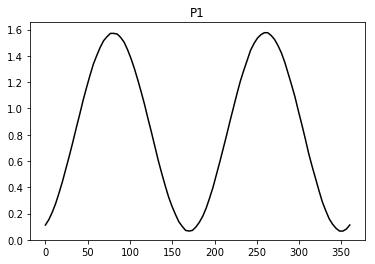

In [32]:
# Data of the experiment
num_data = 90
angle1 = sp.linspace(0,360,num_data)
intensity1 = sp.zeros_like(angle1,dtype=float)
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [angle, 0, 0, th0p2+90], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Experimento_3b_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1, intensity_max=intensity_max-intensity_max0)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1,'k')
plt.title('P1')
plt.ylim(0,intensity1.max()*1.05)

Now, both at the same time for checking

In [81]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

-0.0039, 



1.5363, 1.4391, 0.8097, 0.1906, 0.1189, 0.6511, 1.3367, 1.5721, 1.1628, 0.4566, 0.0678, 0.3287, 1.0093, 1.5312, 

1.0655, 1.5516, 1.4033, 0.7534, 0.1547, 0.1394, 0.7074, 1.3777, 1.5619, 1.1065, 0.4055, 0.0626, 0.3697, 1.0707, 

0.4208, 1.1218, 1.5568, 1.3572, 0.6920, 0.1343, 0.1650, 0.7636, 1.4033, 1.5363, 1.0451, 0.3594, 0.0626, 0.4208, 

0.0678, 0.4618, 1.1628, 1.5619, 1.3163, 0.6408, 0.1189, 0.1957, 0.8046, 1.4237, 1.5107, 0.9990, 0.3236, 0.0678, 

0.2827, 0.0729, 0.5027, 1.1986, 1.5721, 1.2856, 0.5999, 0.1036, 0.2161, 0.8506, 1.4493, 1.4954, 0.9530, 0.2827, 

0.8967, 0.2468, 0.0831, 0.5487, 1.2497, 1.5721, 1.2446, 0.5436, 0.0780, 0.2520, 0.9018, 1.4749, 1.4749, 0.8967, 

1.4544, 0.8506, 0.2213, 0.0985, 0.5999, 1.2907, 1.5721, 1.1986, 0.4976, 0.0678, 0.2878, 0.9581, 1.4954, 1.4544, 

1.5209, 1.4288, 0.8046, 0.1906, 0.1189, 0.6460, 1.3265, 1.5670, 1.1576, 0.4566, 0.0678, 0.3236, 1.0093, 1.5312, 

1.0604, 1.5465, 1.4033, 0.7483, 0.1547, 0.1343, 0.7022, 1.3726, 1.5568, 1.1065, 0.4106

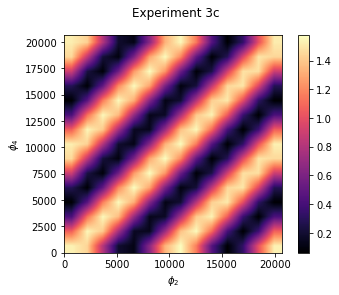

In [33]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,360,num_dataX)
angles2y = sp.linspace(0,360,num_dataY)
intensities_2 = sp.zeros((num_dataX, num_dataY),dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [angle1, 0, 0, angle4], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_3c_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2, intensity_max=intensity_max-intensity_max0)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2, title='Experiment 3c')

## 4th experiment

Place the first retarder, R1.

In [55]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

-0.0039, 



1.6130, 1.6028, 1.4237, 1.1116, 0.7329, 0.3850, 0.1496, 0.0626, 0.1701, 0.4208, 0.7790, 1.1525, 1.4544, 1.6130, 

1.5158, 1.5261, 1.3777, 1.1065, 0.7841, 0.4771, 0.2520, 0.1752, 0.2417, 0.4618, 0.7688, 1.0962, 1.3623, 1.5158, 

1.2805, 1.3060, 1.2242, 1.0553, 0.8455, 0.6357, 0.4720, 0.4004, 0.4413, 0.5641, 0.7636, 0.9786, 1.1730, 1.2907, 

0.9683, 0.9990, 0.9939, 0.9632, 0.9018, 0.8353, 0.7688, 0.7227, 0.7074, 0.7278, 0.7790, 0.8506, 0.9120, 0.9683, 

0.6255, 0.6613, 0.7432, 0.8455, 0.9530, 1.0348, 1.0758, 1.0655, 1.0093, 0.9172, 0.8097, 0.7074, 0.6408, 0.6306, 

0.3338, 0.3645, 0.5078, 0.7278, 0.9786, 1.2037, 1.3367, 1.3674, 1.2753, 1.0860, 0.8455, 0.6050, 0.4208, 0.3287, 

0.1343, 0.1599, 0.3390, 0.6357, 0.9734, 1.2907, 1.5005, 1.5568, 1.4493, 1.2088, 0.8813, 0.5436, 0.2724, 0.1394, 

0.0831, 0.0933, 0.2724, 0.5846, 0.9530, 1.2907, 1.5261, 1.6028, 1.5056, 1.2600, 0.9069, 0.5436, 0.2468, 0.0831, 

0.1803, 0.1803, 0.3185, 0.5846, 0.9069, 1.1986, 1.4237, 1.5005, 1.4288, 1.2190, 0.9172

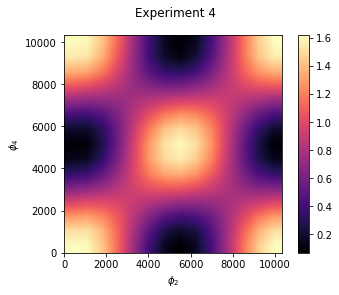

In [34]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,180,num_dataX)
angles2y = sp.linspace(0,180,num_dataY)
intensities_2 = sp.zeros((num_dataX, num_dataY),dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [angle1, 0, 0, angle4], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_4_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2, intensity_max=intensity_max-intensity_max0)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2, title='Experiment 4')

## 5th experiment

Place the second retarder, R2.

In [58]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)

-0.0039, 



1.2088, 0.9837, 1.0093, 1.2702, 1.5209, 1.5363, 1.2958, 0.9888, 0.8813, 1.0655, 1.3777, 1.5516, 1.4544, 1.1781, 

0.9786, 0.6664, 0.5897, 0.8455, 1.2549, 1.5312, 1.5261, 1.3112, 1.1269, 1.1269, 1.2856, 1.3828, 1.2753, 0.9581, 

0.6715, 0.3645, 0.2571, 0.4618, 0.8967, 1.3265, 1.5465, 1.5005, 1.3214, 1.1679, 1.1116, 1.0707, 0.9274, 0.6511, 

0.3645, 0.1547, 0.1036, 0.2878, 0.6715, 1.1167, 1.4493, 1.5568, 1.4698, 1.2702, 1.0400, 0.8199, 0.5948, 0.3543, 

0.2008, 0.0831, 0.1496, 0.3799, 0.7227, 1.0707, 1.3674, 1.5363, 1.5619, 1.4340, 1.1628, 0.8046, 0.4618, 0.1957, 

0.2775, 0.1701, 0.3338, 0.6613, 0.9990, 1.2344, 1.3777, 1.4749, 1.5516, 1.5516, 1.3879, 1.0348, 0.6101, 0.2724, 

0.5897, 0.4157, 0.5743, 0.9479, 1.3060, 1.4698, 1.4391, 1.3674, 1.3930, 1.5005, 1.5363, 1.3419, 0.9632, 0.5743, 

1.0144, 0.7636, 0.8046, 1.1167, 1.4595, 1.5721, 1.4288, 1.1832, 1.0860, 1.2190, 1.4493, 1.5158, 1.3316, 0.9888, 

1.3777, 1.1167, 1.0195, 1.1576, 1.3726, 1.4340, 1.2293, 0.8967, 0.6971, 0.7995, 1.1372

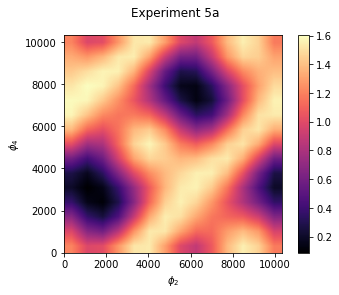

In [35]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,180,num_dataX)
angles2y = sp.linspace(0,180,num_dataY)
intensities_2 = sp.zeros((num_dataX, num_dataY),dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [th0p1, angle1, angle4, th0p2], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_5a_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2, intensity_max=intensity_max-intensity_max0)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2, title='Experiment 5a')

Same, rotating the second polarizer 90º.

In [ ]:
# Background level
intensity_0 = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)



0.4464, 0.6664, 0.6255, 0.3697, 0.1240, 0.1138, 0.3748, 0.6818, 0.7943, 0.6050, 0.2724, 0.0729, 0.1599, 0.4413, 

0.6818, 0.9939, 1.0553, 0.7892, 0.3850, 0.1138, 0.1292, 0.3492, 0.5487, 0.5487, 0.3799, 0.2571, 0.3543, 0.6715, 

1.0041, 1.3060, 1.4033, 1.1883, 0.7432, 0.3031, 0.0933, 0.1445, 0.3390, 0.4976, 0.5436, 0.5692, 0.7022, 0.9837, 

1.3060, 1.5209, 1.5619, 1.3674, 0.9683, 0.5232, 0.1906, 0.0831, 0.1803, 0.3748, 0.5999, 0.8097, 1.0348, 1.2856, 

1.4595, 1.5823, 1.5158, 1.2702, 0.9223, 0.5641, 0.2724, 0.1036, 0.0729, 0.2110, 0.4720, 0.8046, 1.1525, 1.4340, 

1.3623, 1.4800, 1.3112, 0.9786, 0.6460, 0.4055, 0.2673, 0.1701, 0.0933, 0.0831, 0.2366, 0.5641, 0.9888, 1.3367, 

1.0502, 1.2190, 1.0604, 0.6818, 0.3338, 0.1752, 0.2110, 0.2827, 0.2622, 0.1496, 0.1036, 0.2673, 0.6357, 1.0246, 

0.6357, 0.8865, 0.8302, 0.5129, 0.1803, 0.0678, 0.2264, 0.4771, 0.5846, 0.4464, 0.2059, 0.1087, 0.2827, 0.6204, 

0.2878, 0.5436, 0.6306, 0.4822, 0.2622, 0.2110, 0.4259, 0.7688, 0.9734, 0.8762, 0.5283

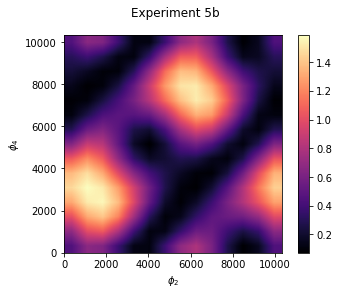

In [36]:
# Data of the experiment
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,180,num_dataX)
angles2y = sp.linspace(0,180,num_dataY)
intensities_2 = sp.zeros((num_dataX, num_dataY),dtype=float)
for ind1, angle1 in enumerate(angles2x):
    print("\n")
    for ind4, angle4 in enumerate(angles2y):
        motors.move(
            positions = [th0p1, angle1, angle4, th0p2+90], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind4] = get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Experimento_5b_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2, intensity_max=intensity_max-intensity_max0)
# Plot results, 2D
dibujar_2d_fitting(angles2x, angles2y, intensity2, title='Experiment 5b')

## Final

In [37]:
motors.close()
del motors
LabJackPython.Close()